In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

%matplotlib inline

In [2]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#7FFFD4', '#9ACD32', '#FFA500']

# Digits dataset

In [3]:
# load digits dataset
raw = load_digits(n_class=10)
digits = raw.data
image = raw.images
target = raw.target

print(digits.shape)
print(np.unique(target))

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


In [4]:
# process the data
data = copy.deepcopy(digits)
label = copy.deepcopy(target)

n = len(data)
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data = data - mean

# PCA

In [5]:
# create the traditional PCA model
cov = np.dot(data.T, data) / n
U, S, V = np.linalg.svd(cov)

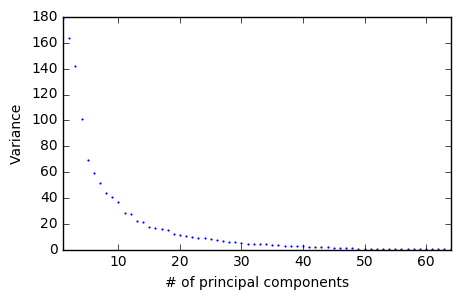

In [6]:
variance = S
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(range(1, len(variance)+1), variance, '.', markersize=2)
ax.set_xlabel('# of principal components')
ax.set_ylabel('Variance')
ax.set_xlim([1, len(S)])
plt.show()

In [7]:
# project to the first two components
components = U
projection = np.dot(data, components)

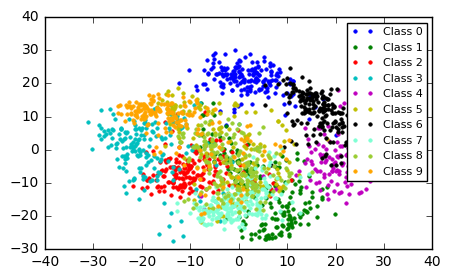

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
for i in range(10):
    tmp = projection[label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=5, label='Class ' + str(i))
    
ax.legend(fontsize=8)
plt.show()

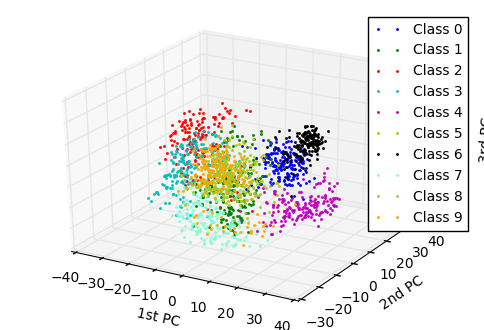

In [9]:
# plot the clustered data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], tmp[:, 2], '.', color=colors[i], markersize=3, label='Class ' + str(i))
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
# ax.view_init(30)
ax.legend(fontsize=10)
plt.show()

# Kernel PCA

In [10]:
kpca = KernelPCA(kernel='poly', degree=2, fit_inverse_transform=False, gamma=10, n_jobs=4)

projection = kpca.fit_transform(data)

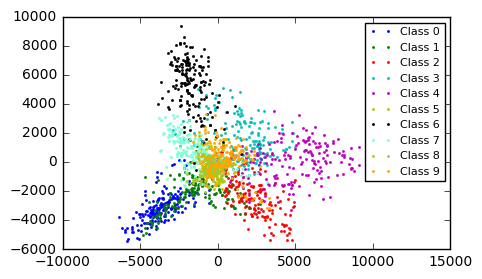

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))
for i in range(10):
    tmp = projection[label == i]
    plt.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], markersize=3, label='Class ' + str(i))
    
ax.legend(fontsize=8)
plt.show()

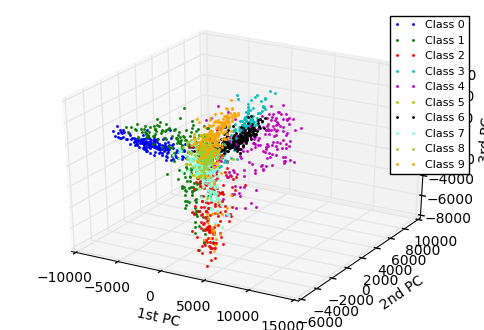

In [12]:
# plot the clustered data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    tmp = projection[label == i]
    ax.plot(tmp[:, 0], tmp[:, 1], tmp[:, 2], '.', color=colors[i], markersize=3, label='Class ' + str(i))
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
# ax.view_init(30)
ax.legend(fontsize=8)
plt.show()